In [112]:
import numpy as np
import pandas as pd
import time
from datetime import datetime as dt
pd.set_option('display.max_rows', 30)
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error as mse

In [6]:
fileName = "Online Retail.xlsx"
data_raw = pd.read_excel("Online Retail.xlsx")
data = data_raw.copy()

In [7]:
#Datetime transformation
data['date'] = pd.to_datetime(data.InvoiceDate.dt.date)
data['time'] = data.InvoiceDate.dt.time
data['hour'] = data['time'].apply(lambda x: x.hour)
data['weekend'] = data['date'].apply(lambda x: x.weekday() in [5, 6])
data['dayofweek'] = data['date'].apply(lambda x: x.dayofweek)

data['Revenue'] = data['Quantity'] * data['UnitPrice']
data.drop(["StockCode","Description","Country"],axis = 1, inplace = True)
data.dropna(inplace = True)

In [8]:
data[50:150]

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,date,time,hour,weekend,dayofweek,Revenue
50,536373,6,2010-12-01 09:02:00,3.39,17850.0,2010-12-01,09:02:00,9,False,2,20.34
51,536373,8,2010-12-01 09:02:00,2.75,17850.0,2010-12-01,09:02:00,9,False,2,22.00
52,536373,6,2010-12-01 09:02:00,4.95,17850.0,2010-12-01,09:02:00,9,False,2,29.70
53,536373,6,2010-12-01 09:02:00,1.06,17850.0,2010-12-01,09:02:00,9,False,2,6.36
54,536373,6,2010-12-01 09:02:00,1.06,17850.0,2010-12-01,09:02:00,9,False,2,6.36
...,...,...,...,...,...,...,...,...,...,...,...
145,536382,10,2010-12-01 09:45:00,1.95,16098.0,2010-12-01,09:45:00,9,False,2,19.50
146,536382,10,2010-12-01 09:45:00,2.10,16098.0,2010-12-01,09:45:00,9,False,2,21.00
147,536382,50,2010-12-01 09:45:00,1.85,16098.0,2010-12-01,09:45:00,9,False,2,92.50
148,536382,8,2010-12-01 09:45:00,2.95,16098.0,2010-12-01,09:45:00,9,False,2,23.60


In [116]:
revenue_ts = data.groupby("date")["Revenue"].sum()
revenue_train = revenue_ts.values[0:215]
revenue_test = revenue_ts.values[215:]
print(len(revenue_train))
print(len(revenue_test))

215
90


Figure out d value

In [94]:
result0 = adfuller(revenue_train)
result1 = adfuller(np.diff(revenue_train))
print("result0:",result0[1])
print("result1:",result1[1])

result0: 0.0004629502183949144
result1: 1.4251259551316064e-28


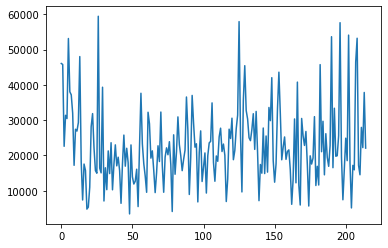

In [95]:
plt.plot(revenue_train)

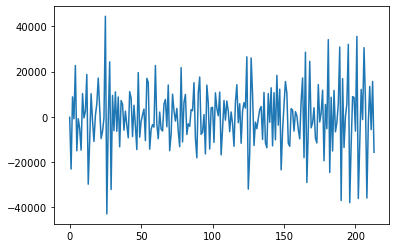

In [96]:
plt.plot(np.diff(revenue_train))

Finding optimal p and q values order = (p,d,q)

In [99]:
p_values = [4,5,6,7,8,9,10]
q_values = [3,4,5]
models = []
for p in p_values:
    for q in q_values:
        t1 = time.time()
        arima_model = ARIMA(revenue_train, order = (p,0,q))
        model = arima_model.fit()
        t2 = time.time()
        parameters = (p,0,q)
        run_time = t2-t1
        models.append((model, run_time, parameters))
        print("model with p value {} and q value {} is trained".format(p,q))

D:\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


model with p value 4 and q value 3 is trained
model with p value 4 and q value 4 is trained
model with p value 4 and q value 5 is trained
model with p value 5 and q value 3 is trained
model with p value 5 and q value 4 is trained
model with p value 5 and q value 5 is trained
model with p value 6 and q value 3 is trained
model with p value 6 and q value 4 is trained
model with p value 6 and q value 5 is trained
model with p value 7 and q value 3 is trained
model with p value 7 and q value 4 is trained
model with p value 7 and q value 5 is trained


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


model with p value 8 and q value 3 is trained
model with p value 8 and q value 4 is trained
model with p value 8 and q value 5 is trained


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


model with p value 9 and q value 3 is trained
model with p value 9 and q value 4 is trained
model with p value 9 and q value 5 is trained


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


model with p value 10 and q value 3 is trained
model with p value 10 and q value 4 is trained
model with p value 10 and q value 5 is trained


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [109]:
for model in models:
    print(model[0].summary(),model[2])
    print("******************************************************************************************")
    print("******************************************************************************************")
    print("******************************************************************************************")

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  215
Model:                     ARMA(4, 3)   Log Likelihood               -2288.201
Method:                       css-mle   S.D. of innovations           9997.259
Date:                Tue, 19 Jul 2022   AIC                           4594.403
Time:                        23:37:02   BIC                           4624.738
Sample:                             0   HQIC                          4606.660
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.259e+04    830.321     27.205      0.000     2.1e+04    2.42e+04
ar.L1.y        0.3120      0.076      4.121      0.000       0.164       0.460
ar.L2.y        0.0529      0.041      1.297      0.1

In [107]:
model[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  215
Model:                    ARMA(10, 5)   Log Likelihood               -2274.199
Method:                       css-mle   S.D. of innovations           9272.169
Date:                Tue, 19 Jul 2022   AIC                           4582.397
Time:                        23:35:49   BIC                           4639.698
Sample:                             0   HQIC                          4605.549
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.206e+04   1329.235     16.596      0.000    1.95e+04    2.47e+04
ar.L1.y       -0.0619      0.282     -0.220      0.826      -0.614       0.490
ar.L2.y       -0.4109      0.114     -3.594      0.000      -0.635      -0.187
ar.L3.y        0.0729      0.170      0.428      0.669      -0.261       0.407
ar.L4.y       -0.7933      0.110     -7.210      0.000      -1.009      -0.578
ar.L5.y       -0.0483      0.251     -0.192      0.847      -0.541       0.444
ar.L6.y        0.3858      0.116      3.320      0.001       0.158       0.613
ar.L7.y        0.0431      0.085      0.508      0.612      -0.123       0.210
ar.L8.y        0.0823      0.080      1.030      0.303      -0.074       0.239
ar.L9.y        0.0562      0.072      0.782      0.434      -0.085       0.197
ar.L10.y       0.2588      0.073      3.561      0.000       0.116       0.401
ma.L1.y        0.2042      0.291      0.702      0.483      -0.366       0.775
ma.L2.y        0.4306      0.062      6.990      0.000       0.310       0.551
ma.L3.y        0.0100      0.152      0.066      0.948      -0.289       0.309
ma.L4.y        0.9261      0.069     13.429      0.000       0.791       1.061
ma.L5.y        0.3922      0.286      1.371      0.170      -0.169       0.953
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.1853           -0.0000j            1.1853           -0.0000
AR.2             0.6761           -0.8298j            1.0704           -0.1412
AR.3             0.6761           +0.8298j            1.0704            0.1412
AR.4             0.5745           -1.0531j            1.1996           -0.1705
AR.5             0.5745           +1.0531j            1.1996            0.1705
AR.6            -0.5458           -0.8506j            1.0106           -0.3408
AR.7            -0.5458           +0.8506j            1.0106            0.3408
AR.8            -1.2355           -0.0000j            1.2355           -0.5000
AR.9            -0.7883           -0.9724j            1.2517           -0.3584
AR.10           -0.7883           +0.9724j            1.2517            0.3584
MA.1             0.6603           -0.7510j            1.0000           -0.1352
MA.2             0.6603           +0.7510j            1.0000            0.1352
MA.3            -0.5663           -0.8243j            1.0001           -0.3458
MA.4            -0.5663           +0.8243j            1.0001            0.3458
MA.5            -2.5489           -0.0000j            2.5489           -0.5000
------------------------------------------------------------------------------
"""

(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(2, 1, 1)
(2, 1, 2)
(2, 1, 3)
(3, 1, 1)
(3, 1, 2)
(3, 1, 3)
(4, 1, 1)
(4, 1, 2)
(4, 1, 3)
(5, 1, 1)
(5, 1, 2)
(5, 1, 3)


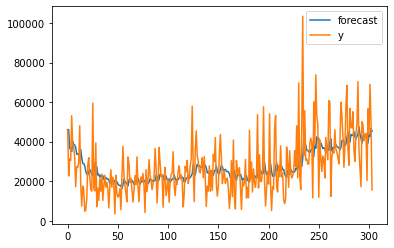

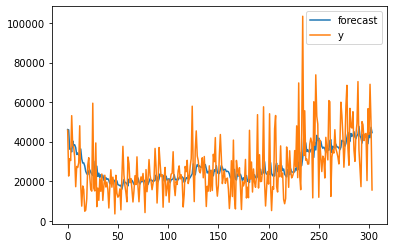

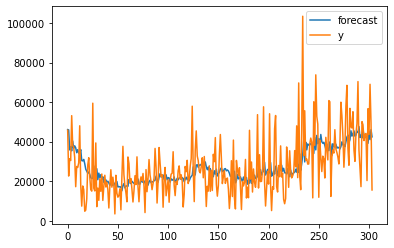

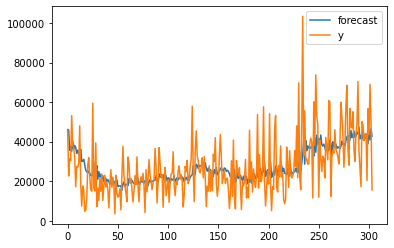

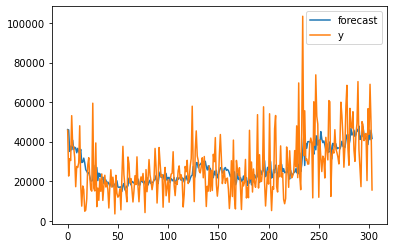

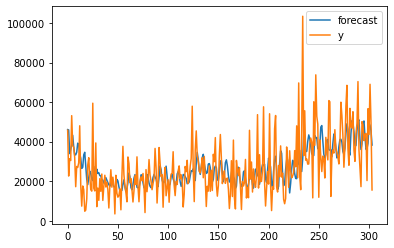

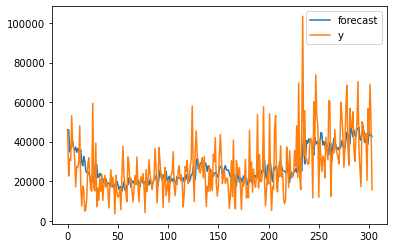

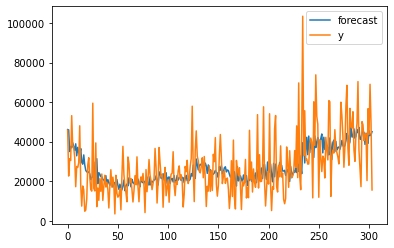

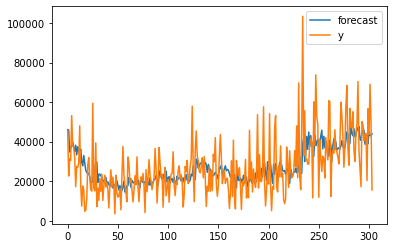

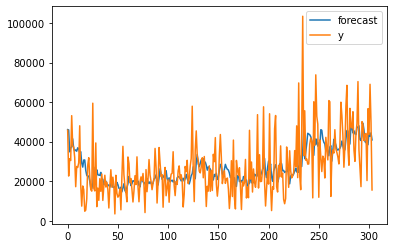

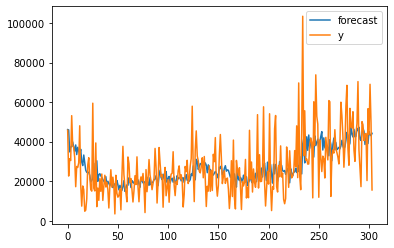

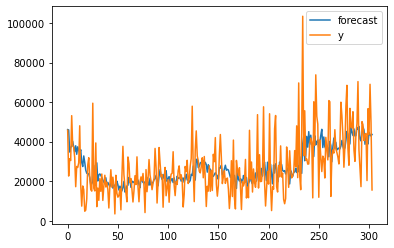

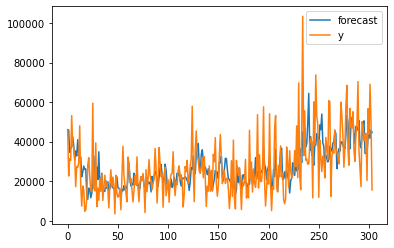

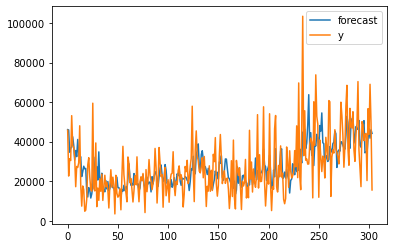

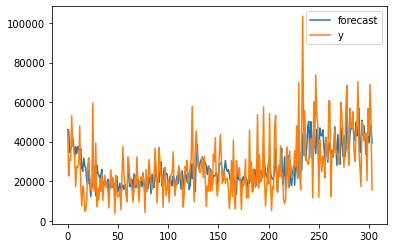

In [75]:
for model in models:
    model[0].plot_predict()
    print(model[2])

Best AIC score, 4577, is obtained with parameters (5,0,5)

In [110]:
best_model = models[5][0]
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  215
Model:                     ARMA(5, 5)   Log Likelihood               -2276.925
Method:                       css-mle   S.D. of innovations           9564.435
Date:                Tue, 19 Jul 2022   AIC                           4577.850
Time:                        23:38:43   BIC                           4618.298
Sample:                             0   HQIC                          4594.193
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.263e+04   1306.261     17.321      0.000    2.01e+04    2.52e+04
ar.L1.y        0.8418      0.097      8.682      0.000       0.652       1.032
ar.L2.y       -0.9206      0.061    -15.014      0.000      -1.041      -0.800
ar.L3.y        0.8076      0.102      7.920      0.000       0.608       1.007
ar.L4.y       -0.9432      0.070    -13.511      0.000      -1.080      -0.806
ar.L5.y        0.7998      0.099      8.077      0.000       0.606       0.994
ma.L1.y       -0.7045      0.131     -5.365      0.000      -0.962      -0.447
ma.L2.y        0.8052      0.106      7.598      0.000       0.597       1.013
ma.L3.y       -0.6171      0.146     -4.228      0.000      -0.903      -0.331
ma.L4.y        0.8552      0.123      6.957      0.000       0.614       1.096
ma.L5.y       -0.4977      0.147     -3.379      0.001      -0.786      -0.209
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5149           -0.8700j            1.0109           -0.3351
AR.2           -0.5149           +0.8700j            1.0109            0.3351
AR.3            0.5201           -0.8810j            1.0231           -0.1651
AR.4            0.5201           +0.8810j            1.0231            0.1651
AR.5            1.1688           -0.0000j            1.1688           -0.0000
MA.1           -0.5280           -0.9014j            1.0447           -0.3343
MA.2           -0.5280           +0.9014j            1.0447            0.3343
MA.3            0.6090           -0.9012j            1.0876           -0.1554
MA.4            0.6090           +0.9012j            1.0876            0.1554
MA.5            1.5564           -0.0000j            1.5564           -0.0000
-----------------------------------------------------------------------------
"""

In [63]:
best_model.predict(start=303, end=304, dynamic=False, typ="levels")

array([43686.72072553, 42623.14493607])

In [85]:
actual = revenue_ts.values
predicted = best_model.predict(start = 1, end = 305, dynamic = False, typ = "levels")
MSE = mse(actual, predicted)
print(np.sqrt(MSE))

10845.774661943264


In [117]:
predicted = best_model.predict(start = 215, end = 304, dynamic = False, typ = "levels")
actual = revenue_test
print(predicted.shape)
print(actual.shape)

(90,)
(90,)


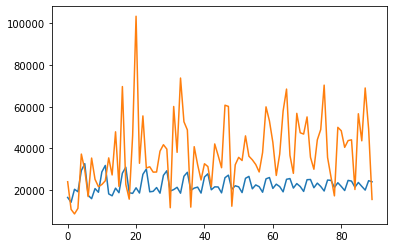

In [118]:
plt.plot(predicted)
plt.plot(actual)

In [121]:
MSE = mse(actual, predicted)
print(np.sqrt(MSE))

22603.20200777825


In [122]:
np.median(actual)

36038.765

In [125]:
actual_total = np.sum(actual)
predicted_total = np.sum(predicted)
print(actual_total - predicted_total)

1412515.0942533028


In [126]:
actual_total

3435665.2619999996